# Web Mining and Applied NLP (44-620)

## Requests, JSON, and NLP

### Student Name: Gabriel Richards

[Github Repository](https://github.com/gjrich/04-json-sentiment)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Make sure you have [installed spaCy and its pipeline](https://spacy.io/usage#quickstart) and [spaCyTextBlob](https://spacy.io/universe/project/spacy-textblob)

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

This assignment requires that you write additional files (either JSON or pickle files); make sure to submit those files in your repository as well.

## Question 1 
The following code accesses the [lyrics.ovh](https://lyricsovh.docs.apiary.io/#reference/0/lyrics-of-a-song/search) public api, searches for the lyrics of a song, and stores it in a dictionary object.  Write the resulting json to a file (either a JSON file or a pickle file; you choose). You will read in the contents of this file for future questions so we do not need to frequently access the API.

In [ ]:
import requests
import json
import pickle
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from textblob import TextBlob
import time
import matplotlib.pyplot as plt


result = json.loads(requests.get('https://api.lyrics.ovh/v1/Beatles/Eleanor Rigby').text)


# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import json and pickle (included in the Python Standard Library).

print('All prereqs installed.')
!pip list

All prereqs installed.
Package                   Version
------------------------- --------------
annotated-types           0.7.0
anyio                     4.6.2.post1
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.2.0
blis                      0.7.11
catalogue                 2.0.10
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.4.0
click                     8.1.7
cloudpathlib              0.20.0
colorama                  0.4.6
comm                      0.2.2
confection                0.1.5
contourpy                 1.3.1
cycler                    0.12.1
cymem                     2.0.8
debugpy                   1.8.8
decorator                 5.1.1
defusedxml                0.7.1
en-core-web-sm    

## Question 2 
Read in the contents of your file.  Print the lyrics of the song (not the entire dictionary!) and use spaCyTextBlob to perform sentiment analysis on the lyrics.  Print the polarity score of the sentiment analysis.  Given that the range of the polarity score is `[-1.0,1.0]` which corresponds to how positive or negative the text in question is, do you think the lyrics have a more positive or negative connotaion?  Answer this question in a comment in your code cell.

In [2]:


# Step 1: Get and save the lyrics
result = json.loads(requests.get('https://api.lyrics.ovh/v1/Beatles/Eleanor Rigby').text)

# Save the lyrics to a JSON file
with open('eleanor_rigby.json', 'w') as file:
    json.dump(result, file)

# Step 2: Load spaCy model and add the SpacyTextBlob component
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

# Read the JSON file containing the lyrics
with open('eleanor_rigby.json', 'r') as file:
    data = json.load(file)

# Get lyrics from the data
lyrics = data['lyrics']

# Perform sentiment analysis
doc = nlp(lyrics)
polarity = doc._.blob.polarity

print(f"Sentiment Analysis Results:")
print(f"Eleanor Rigby Polarity Score: {polarity:.3f}")

 
# Analysis of Results:
# A score of -0.095 shows that it is negative, but only slightly so. 
# Given the darker tone of the song I don't believe that's representative. I expected it to be a greater negative number.
# However, I can see how the model landed on that as the songs words aren't especially negative - most of it is in the melancholy tone of the song's story.




Sentiment Analysis Results:
Eleanor Rigby Polarity Score: -0.095


## Question 3 
Write a function that takes an artist, song, and filename, accesses the lyrics.ovh api to get the song lyrics, and writes the results to the specified filename.  Test this function by getting the lyrics to any four songs of your choice and storing them in different files.

In [3]:

def write_lyrics_ovh_to_json(artist, song, filename):
    """
    Fetches lyrics from lyrics.ovh API and writes them to a JSON file.
    
    Parameters:
    artist (str): Name of the artist
    song (str): Name of the song
    filename (str): Base filename (will be saved as filename.json)
    
    Returns:
    bool: True if successful, False if there was an error
    """
    try:
        # Ensure correct file extension by removing any existing .json and adding it back
        json_filename = filename.rstrip('.json') + '.json'
            
        # Create the API URL
        url = f'https://api.lyrics.ovh/v1/{artist}/{song}'
        
        # Get the response from the API
        response = requests.get(url)
        
        # Check if request was successful
        if response.status_code == 200:
            result = response.json()
            
            # Save to file
            with open(json_filename, 'w', encoding='utf-8') as file:
                json.dump(result, file, ensure_ascii=False, indent=4)
            print(f"Successfully saved lyrics for '{song}' by {artist} to {json_filename}")
            return True
        else:
            print(f"Error fetching lyrics from lyrics.ovh API for '{song}' by {artist}. Status code: {response.status_code}")
            return False
            
    except Exception as e:
        print(f"Error processing '{song}' by {artist}: {str(e)}")
        return False

# Test the function with the four songs
songs = [
    ("Johnny Cash", "Hurt", "hurt"),  
    ("Gloria Gaynor", "I Will Survive", "survive"),
    ("Red Hot Chili Peppers", "Under the Bridge", "bridge"),
    ("Caravan Palace", "Wonderland", "wonderland")
]

for artist, song, filename in songs:
    write_lyrics_ovh_to_json(artist, song, filename)
    time.sleep(1)  # Wait 1 second between requests to avoid overwhelming the API

Successfully saved lyrics for 'Hurt' by Johnny Cash to hurt.json
Successfully saved lyrics for 'I Will Survive' by Gloria Gaynor to survive.json
Successfully saved lyrics for 'Under the Bridge' by Red Hot Chili Peppers to bridge.json
Successfully saved lyrics for 'Wonderland' by Caravan Palace to wonderland.json


## Question 4 
Write a function that takes the name of a file that contains song lyrics, loads the file, performs sentiment analysis, and returns the polarity score.  Use this function to print the polarity scores (with the name of the song) of the four files you created in question 3.  Does the reported polarity match your understanding of the song's lyrics? Why or why not do you think that might be?  Answer the questions in either a comment in the code cell or a markdown cell under the code cell.

In [4]:
def analyze_lyrics_sentiment(filename):
    """
    Loads lyrics from a JSON file and performs sentiment analysis.
    
    """
    try:
        # Load the lyrics from file
        with open(filename, 'r', encoding='utf-8') as file:
            data = json.load(file)
            lyrics = data['lyrics']
            
        # Perform sentiment analysis
        nlp = spacy.load('en_core_web_sm')
        nlp.add_pipe('spacytextblob')
        doc = nlp(lyrics)
        polarity = doc._.blob.polarity
        
        return lyrics, polarity
            
    except Exception as e:
        print(f"Error analyzing {filename}: {str(e)}")
        return None, None

# Analyze songs
songs = [
    ("Hurt - Johnny Cash", "hurt.json"),
    ("I Will Survive - Gloria Gaynor", "survive.json"),
    ("Under the Bridge - RHCP", "bridge.json"),
    ("Wonderland - Caravan Palace", "wonderland.json")
]

print("Sentiment Analysis Scores")
print("Range: [-1.0 to +1.0]")

print("-" * 50)

for song_name, filename in songs:
    lyrics, polarity = analyze_lyrics_sentiment(filename)
    if polarity is not None:
        print(f"{song_name:.<40} {polarity:.3f}")



Sentiment Analysis Scores
Range: [-1.0 to +1.0]
--------------------------------------------------
Hurt - Johnny Cash...................... 0.067
I Will Survive - Gloria Gaynor.......... 0.028
Under the Bridge - RHCP................. 0.221
Wonderland - Caravan Palace............. 0.150


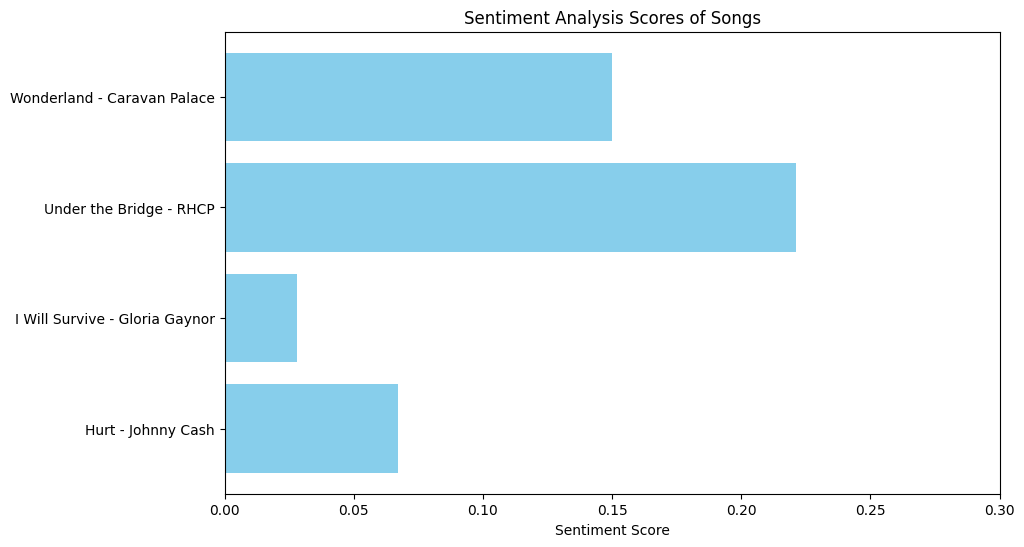

In [ ]:
# Song titles and sentiment analysis scores
songs_list = ['Hurt - Johnny Cash', 'I Will Survive - Gloria Gaynor', 'Under the Bridge - RHCP', 'Wonderland - Caravan Palace']
scores_list = [0.067, 0.028, 0.221, 0.150]

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.barh(songs_list, scores_list, color='skyblue')
plt.xlabel('Sentiment Score')
plt.title('Sentiment Analysis Scores')
plt.xlim(0, 0.3)  # Adjust this limit based on your scores range
plt.show()



## Analysis of Results:

### 1. "Hurt" (Johnny Cash) - Polarity: 0.067
   Surprisingly, this deeply emotional song about pain and regret shows a slightly positive
   polarity score. This is a clear example of the sentiment analyzer's limitations. The
   song's profound sadness, self-loathing, and themes of addiction aren't properly captured.
   Words like "crown" (though it's "crown of thorns") might be read as positive, while the
   complex emotional context is missed.

### 2. "I Will Survive" (Gloria Gaynor) - Polarity: 0.028
   This shows a neutral score. While the song
   does discuss negative experiences (being dumped, feeling afraid), the main message is about
   strength and survival. The almost-zero score suggests the analyzer is averaging out the
   negative descriptions of past events with the positive declarations of survival, missing
   the overall triumphant message.

### 3. "Under the Bridge" (RHCP) - Polarity: 0.221
   Oddly, this song about loneliness has the highest positive score of
   the four. This might be due to words about love for the city ("she sees my good deeds")
   and finding comfort.

### 4. "Wonderland" (Caravan Palace) - Polarity: 0.150
   While the song is abstract, it uses playful and whimsical imagery. 
   However, the score is still quite low considering the upbeat nature of the song.

## Key Issues with the Analysis:
### 1. Compression of Scores
   All scores fall within a very narrow range (0.028 to 0.221),
   despite the songs having vastly different emotional tones. This suggests the analyzer
   is not effectively distinguishing between strongly positive and negative context.

### 2. Context Failure
   The most striking example is "Hurt" showing a positive score despite
   being one of the darkest songs in the set. This reveals how the analyzer fails to
   understand context and emotional weight.

### 3. Metaphor Blindness
   Complex metaphors and poetic language in songs like "Under the Bridge"
   lead to scores that don't align with the songs' actual emotional impact.

### 4. Narrative Arc Blindness
   "I Will Survive" demonstrates how the analyzer doesn't capture
   the progression from negative to positive, instead averaging everything into a nearly
   neutral score.

These results suggest that traditional sentiment analysis tools, while useful for
straightforward text, may need significant adaptation to be effective for song lyrics,
which rely heavily on context, metaphor, and emotional subtext that this NLP
model struggled to comprehend.
"""

In [6]:
# Test the full range of the sentiment analyzer
# I was curious about why the scores of the songs I picked were so low. I wanted to run a couple more tests to confirm the full range of -1 to +1 was accurate
test_texts = {
    "Extremely Negative": "This is horrible, terrible, awful, devastating, tragic, and painful. I hate everything about this disgusting mess.",
    "Extremely Positive": "This is wonderful, amazing, fantastic, beautiful, delightful, and joyous! I love everything about this brilliant masterpiece!",
    "Mixed": "While the beginning was terrible and horrible, the ending was wonderful and delightful."
}

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

print("\nPolarity Range Test")
print("-" * 50)
for label, text in test_texts.items():
    doc = nlp(text)
    print(f"{label}: {doc._.blob.polarity:.3f}")


Polarity Range Test
--------------------------------------------------
Extremely Negative: -0.825
Extremely Positive: 0.764
Mixed: 0.000
